In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import norm

A french cake shop claims that the average number of pastries they can produce in a day exceeds 500.
The average number of pastries produced per day over a 70 day period was found to be 530.
Assume that the population standard deviation for the pastries produced per day is 125.
Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.



In [4]:
norm.ppf(0.96)

1.7506860712521692

2.0079840636817816

# T - Test


In [8]:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [9]:
np.mean(iq_scores)

103.5

In [7]:
from scipy.stats import ttest_1samp

In [10]:
t_stat, pvalue = ttest_1samp(iq_scores,100)

In [11]:
pvalue

0.1754994493585011

In [12]:
alpha = 0.01 # 99% confidence level

if pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


## Two sample test

In [19]:
from scipy.stats import ttest_ind # Independent t-test "2-sample test"

In [14]:
import pandas as pd

df_iq = pd.read_csv('./iq_two_schools.csv')
df_iq.head()


,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [16]:
df_iq.groupby('School')['iq'].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

In [17]:
df_iq['School'].value_counts()

School
school_1    26
school_2    24
Name: count, dtype: int64

In [18]:
iq_1 = df_iq[df_iq['School'] == 'school_1']['iq']
iq_2 = df_iq[df_iq['School'] == 'school_2']['iq']

In [34]:
# t_stat, pvalue = ttest_ind(iq_1, iq_2, alternative='two-sided' )
#* Both are same because by default it do a two-sided test
t_stat, pvalue = ttest_ind(iq_1, iq_2)

alpha = 0.05 # 95% confidence level
if pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [36]:
t_stat, pvalue = ttest_ind(iq_1, iq_2, alternative='less' )

alpha = 0.05 # 95% confidence level
if pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [32]:
t_stat, pvalue = ttest_ind(iq_1, iq_2, alternative='greater' )

alpha = 0.05 # 95% confidence level
if pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Cricket Example

In [37]:
df = pd.read_csv('./Sachin_ODI.csv')
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [38]:
df.groupby('Inns')['runs'].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [39]:
df['Inns'].value_counts()

Inns
2    190
1    170
Name: count, dtype: int64

In [41]:
df_first_innings = df[df['Inns'] == 1]['runs']
df_second_innings = df[df['Inns'] == 2]['runs']

In [42]:
t_stat, pvalue = ttest_ind(df_first_innings, df_second_innings, alternative='greater')
print(pvalue)

0.07241862097379981


In [43]:
alpha = 0.05 # 95% confidence level

if pvalue < alpha:
    print("We reject the null hypothesis")
    print("First Inning is better")
else:
    print("We fail to reject the null hypothesis")
    print("Second Inning is better")

We fail to reject the null hypothesis
First Inning is better


#### By Runs

In [44]:
df.groupby('Won')['runs'].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [45]:
df['Won'].value_counts()

Won
True     184
False    176
Name: count, dtype: int64

In [46]:
df_won = df[df['Won'] == 1]['runs']
df_lost = df[df['Won'] == 0]['runs']

In [49]:
t_stat, pvalue = ttest_ind(df_won, df_lost, alternative='greater')
pvalue

0.00016353077486826558

In [52]:
alpha = 0.05 # 95% confidence level
if pvalue < alpha:
    print("We reject the null hypothesis")
    print("Sachin have Higher avg in wining")
else:
    print("We fail to reject the null hypothesis")
    print("Sachin have Higher avg in losing")

We reject the null hypothesis
Sachin have Higher avg in wining


## Aerolift Case Study

In [53]:
df = pd.read_csv('./aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='Gender', ylabel='Income'>

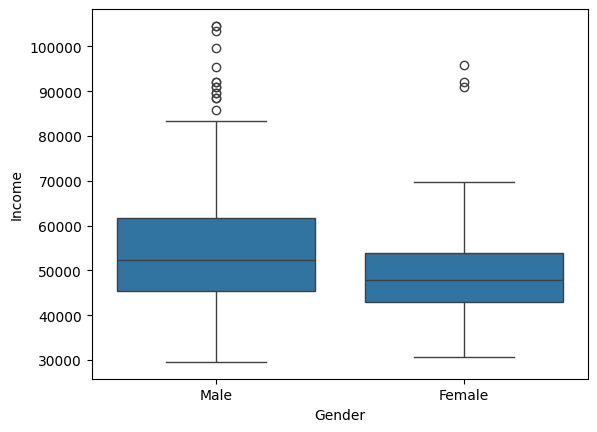

In [54]:
sns.boxplot(x='Gender' , y='Income', data=df)

In [59]:
income_male = df[df['Gender'] == 'Male']['Income']
print(income_male.mean())
income_female = df[df['Gender'] == 'Female']['Income']
print(income_female.mean())

56562.75961538462
49828.90789473684


In [62]:
t_stat, pvalue = ttest_ind(income_male, income_female, alternative='greater')
pvalue

0.003263631548607129

# Two Sample Paired(Relative) T-Test

## Problem solving Session Dataset (Paired Data)

In [63]:
Path= './problem_solving.csv'
df_ps = pd.read_csv(Path)

In [64]:
len(df_ps)

137

In [65]:
df_ps.head()

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43


In [66]:
df_ps.describe()

,id,test_1,test_2
count,137.000000,137.000000,137.000000
mean,68.000000,60.489051,62.430657
std,39.692569,17.080311,17.516293
min,0.000000,30.000000,27.000000
25%,34.000000,46.000000,48.000000
50%,68.000000,59.000000,62.000000
75%,102.000000,75.000000,77.000000
max,136.000000,89.000000,96.000000


In [67]:
from scipy.stats import ttest_rel # Each pair values are related to each other , not independent

In [69]:
statistic, pvalue = ttest_rel(df_ps['test_1'], df_ps['test_2'], alternative='less')  
pvalue

8.979201768961566e-08